In [2]:
import os
import cv2
import time
import argparse
import multiprocessing
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from object_detection.utils import label_map_util as label_map_util
from object_detection.utils import visualization_utils as vis_util

/home/student/tensorflow/models-master/research/object_detection/utils/visualization_utils.py:27: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/student/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/student/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/student/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    s

In [4]:
CWD_PATH = os.getcwd()
CWD_PATH="/home/student/tensorflow/models-master/research"
print("jwang")
print (CWD_PATH)

# Path to frozen detection graph. This is the actual model that is used for the object detection.
#MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
PATH_TO_CKPT = os.path.join(CWD_PATH, 'object_detection', MODEL_NAME, 'frozen_inference_graph.pb')

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join(CWD_PATH, 'object_detection', 'data', 'mscoco_label_map.pbtxt')


jwang
/home/student/tensorflow/models-master/research


In [5]:
NUM_CLASSES = 90

# Loading label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [6]:
def detect_objects(image_np, sess, detection_graph):
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')

    # Actual detection.
    (boxes, scores, classes, num_detections) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})

    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8)
    return image_np

In [10]:
# First test on images
PATH_TO_TEST_IMAGES_DIR = '/home/student/tensorflow/models-master/research/object_detection/test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [11]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

((1024, 636), (636, 1024, 3))
((1352, 900), (900, 1352, 3))


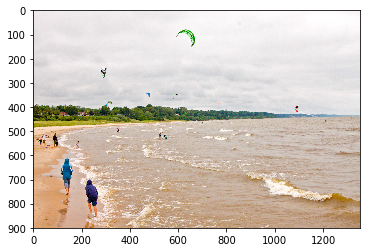

In [12]:
from PIL import Image
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    image_np = load_image_into_numpy_array(image)
    plt.imshow(image_np)
    print(image.size, image_np.shape)

In [13]:
#Load a frozen TF model 
print(PATH_TO_CKPT)
detection_graph = tf.Graph()
print(detection_graph)
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

/home/student/tensorflow/models-master/research/object_detection/ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb


NotFoundError: /home/student/tensorflow/models-master/research/object_detection/ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb; No such file or directory

In [14]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_process = detect_objects(image_np, sess, detection_graph)
            print(image_process.shape)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_process)
      

KeyError: "The name 'image_tensor:0' refers to a Tensor which does not exist. The operation, 'image_tensor', does not exist in the graph."

In [16]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML as HTML

In [17]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # you should return the final output (image with lines are drawn on lanes)
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            image_process = detect_objects(image, sess, detection_graph)
            return image_process

In [19]:
white_output = 'video1_out.mp4'
clip1 = VideoFileClip("video1.mp4").subclip(0,2)
print(detection_graph)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!s
%time white_clip.write_videofile(white_output, audio=False)

KeyError: "The name 'image_tensor:0' refers to a Tensor which does not exist. The operation, 'image_tensor', does not exist in the graph."

In [20]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [21]:
white_output1 = 'cars_out.mp4'
clip1 = VideoFileClip("cars.mp4").subclip(0,2)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!s
%time white_clip.write_videofile(white_output1, audio=False)

KeyError: "The name 'image_tensor:0' refers to a Tensor which does not exist. The operation, 'image_tensor', does not exist in the graph."

In [22]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output1))

In [4]:
white_output2 = 'fruits1_out.mp4'
clip2 = VideoFileClip("fruits1.mp4").subclip(0,1)
white_clip = clip2.fl_image(process_image) #NOTE: this function expects color images!!s
%time white_clip.write_videofile(white_output2, audio=False)

NameError: name 'VideoFileClip' is not defined

In [5]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output2))

NameError: name 'HTML' is not defined

In [6]:
white_output3 = 'dog_out.mp4'
clip3 = VideoFileClip("dog.mp4").subclip(12,14)
white_clip = clip3.fl_image(process_image) #NOTE: this function expects color images!!s
%time white_clip.write_videofile(white_output3, audio=False)

NameError: name 'VideoFileClip' is not defined

In [7]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output3))

NameError: name 'HTML' is not defined

In [42]:
# Merge videos
from moviepy.editor import VideoFileClip, concatenate_videoclips
clip1 = VideoFileClip("cars_out.mp4")
clip2 = VideoFileClip("fruits1_out.mp4")
clip3 = VideoFileClip("dog_out.mp4")
final_clip = concatenate_videoclips([clip1,clip2,clip3], method="compose")
final_clip.write_videofile("my_concatenation.mp4",bitrate="5000k")

[MoviePy] >>>> Building video my_concatenation.mp4
[MoviePy] Writing video my_concatenation.mp4


100%|██████████| 150/150 [00:00<00:00, 189.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: my_concatenation.mp4 



In [43]:
from moviepy.editor import *
clip = VideoFileClip("my_concatenation.mp4")
clip.write_gif("final.gif")


[MoviePy] Building file final.gif with imageio


100%|██████████| 151/151 [00:11<00:00, 12.35it/s]
